## 1. Install the twitter library in python

In [6]:
!pip3 install tweepy

  Using cached https://files.pythonhosted.org/packages/36/1b/2bd38043d22ade352fc3d3902cf30ce0e2f4bf285be3b304a2782a767aec/tweepy-3.8.0-py2.py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/a3/12/b92740d845ab62ea4edf04d2f4164d82532b5a0b03836d4d4e71c6f3d379/requests_oauthlib-1.3.0-py2.py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/51/bd/23c926cd341ea6b7dd0b2a00aba99ae0f828be89d72b2190f27c11d4b7fb/requests-2.22.0-py2.py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/05/57/ce2e7a8fa7c0afb54a0581b14a65b56e62b5759dbc98e80627142b8a3704/oauthlib-3.1.0-py2.py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/14/2c/cd551d81dbe15200be1cf41cd03869a46fe7226e7450af7a6545bfc474c9/idna-2.8-py2.py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/bc/a9/01ffebfb562e4274b6487b4bb1ddec7ca55ec7510b22e4c51f14098443b8/chardet-3.0.4-py2.py3-none-any.whl
  Using cached https://files.pythonhosted.org/packa

## 2. Install library for JSON

In [7]:
!pip3 install simplejson

  Using cached https://files.pythonhosted.org/packages/9b/f9/34c419bd2e00071d8899b8580c0a91970271c11e0f4a4e8a628a2ddc58ea/simplejson-3.17.0-cp37-cp37m-macosx_10_14_x86_64.whl


In [15]:
!pip3 install pandas

## 3. Install sentiment analysis library

In [8]:
# Whatever library you use
!pip3 install textblob

  Using cached https://files.pythonhosted.org/packages/60/f0/1d9bfcc8ee6b83472ec571406bd0dd51c0e6330ff1a51b2d29861d389e85/textblob-0.15.3-py2.py3-none-any.whl
Processing /Users/albertlleo/Library/Caches/pip/wheels/96/86/f6/68ab24c23f207c0077381a5e3904b2815136b879538a24b483/nltk-3.4.5-cp37-none-any.whl


# Streaming tweets and perform some data analysis


### Setting up and running a streaming crawler

In [9]:
import tweepy
import simplejson as json
from tweepy import OAuthHandler
from tweepy import Stream
from tweepy.streaming import StreamListener
from textblob import TextBlob
 
#Complete with your keys 

consumer_key = 'aCqrloIHCuvw8rX8sON8B551T'
consumer_secret = 'CkkLBIClzyC2w00oHOateou4wxJ2IberPKXWR8WpQEi0T5Gh2s'
access_token = '173960222-v34xiH0gEFqXCoVvpnh3JgMp8xwVukAX61rqazBc'
access_secret = '9ey7wPBUkPJdu2ZxaBoOUr43dmFCj2Fql1MxBCPKEoVFg'
 
auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)
print("Starting code")
print(auth)
 

class MyListener(StreamListener):
    
    def __init__(self, filename, api=None):
        super(StreamListener, self).__init__()
        self.num_tweets = 0
        self.filename = filename

    def on_data(self, data):
        try:
            with open(self.filename, 'a') as f:
                #print("test")
                if json.loads(data).get('place'):
                    print(json.loads(data)['place']['country'])
                    if json.loads(data)['place']['country'].lower() in ['spain', 'españa', 'espana']:
                        f.write(data) # This will store the whole JSON data in the file, you can perform some JSON filters
                        twitter_text = json.loads(data)['text'] # You can also print your tweets here
                        print(twitter_text)
                        self.num_tweets += 1

                # Just to limit the number of tweets collected to check the 
                # program at the beginning, then increase the limit
                if self.num_tweets < 100:
                    return True
                else:
                    print('______________ END ', self.filename)
                    return False
        except BaseException as e:
            print("Error on_data: %s" % str(e))
        return True

 
    def on_error(self, status):
        print('Error :', status.place)
        return False
    
"""twitter_stream = Stream(auth, MyListener('gobierno2.json'))
twitter_stream.filter(track=["gobierno", "elecciones"], languages=["es"]) # Add your keywords and other filters

twitter_stream = Stream(auth, MyListener('pp.json'))
twitter_stream.filter(track=["pp"], languages=["es"]) # Add your keywords and other filters


twitter_stream = Stream(auth, MyListener('psoe.json'))
twitter_stream.filter(track=["psoe"], languages=["es"]) # Add your keywords and other filters

twitter_stream = Stream(auth, MyListener('cat.json'))
twitter_stream.filter(track=["cataluña", "catalunya"], languages=["es"]) # Add your keywords and other filters

twitter_stream = Stream(auth, MyListener('vox.json'))
twitter_stream.filter(track=["vox"], languages=["es"]) # Add your keywords and other filters

twitter_stream = Stream(auth, MyListener('ciudadanos.json'))
twitter_stream.filter(track=["ciudadanos", "ciutadans"], languages=["es"]) # Add your keywords and other filters

twitter_stream = Stream(auth, MyListener('podemos.json'))
twitter_stream.filter(track=["podemos"], languages=["es"]) # Add your keywords and other filters
"""
print('_______ End _______')



Starting code
_______ End _______


### Store the JSON data in a CSV for analysing

In [10]:
import simplejson as json

# Create the CSV file
files = ["gobierno", "cat", "podemos", "pp", "vox", "ciudadanos", "psoe"]
#files = ["vox","cat","ciudadanos","psoe"]

for file in files:
    with open (file + ".csv", 'w', encoding ='utf-8') as csv:
        # Write the title of the columns (features) that you want to store in the CSV file
        csv.write('id,'+'created_at,'+'text'+'\n')

        # Copy the data from the JSON file
        with open(file + ".json", 'r', encoding ='utf-8') as jsonfile:
            for tweet in jsonfile: 
                data = json.loads(tweet)

                # The int values should be converted to strings
                csv.write(str(data['id'])+',')
                csv.write(str(data['created_at'])+',') 
                csv.write((str(data['text']).replace('\n', "").replace(',', ""))) 
                #csv.write(str(data['place']['country'])) 
                csv.write('\n')
            

### Load the previous CSV into pandas

In [26]:
import pandas as pd

files = ["gobierno", "cat", "podemos", "pp", "vox", "ciudadanos", "psoe"]
#files = ["vox","cat","ciudadanos","psoe"]
tweets_all={}

for file in files:
    tweets_all[file]=pd.read_csv(file + ".csv", index_col = 0, encoding='utf-8')
#count=0
#for tweet in tweets_all:
    


In [27]:
files = ["gobierno", "cat", "podemos", "pp", "vox", "ciudadanos", "psoe"]
for file in files:
    print(tweets_all[file])

                                         created_at  \
id                                                    
1219207558939979776  Mon Jan 20 10:38:28 +0000 2020   
1219208044531331073  Mon Jan 20 10:40:24 +0000 2020   
1219209720864571392  Mon Jan 20 10:47:03 +0000 2020   
1219210214844641282  Mon Jan 20 10:49:01 +0000 2020   
1219210342557003781  Mon Jan 20 10:49:32 +0000 2020   
...                                             ...   
1219240717375229953  Mon Jan 20 12:50:14 +0000 2020   
1219241253000400896  Mon Jan 20 12:52:21 +0000 2020   
1219241414598578176  Mon Jan 20 12:53:00 +0000 2020   
1219241457980264448  Mon Jan 20 12:53:10 +0000 2020   
1219242138090856449  Mon Jan 20 12:55:52 +0000 2020   

                                                                  text  
id                                                                      
1219207558939979776                              Que cunda el ejemplo.  
1219208044531331073  El gobierno de Ñ debería explicar la relació

### Analysing the polarity of the tweets

In [33]:
!pip install nltk
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/albertlleo/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [51]:
from textblob import TextBlob
analysis = TextBlob("This table is horrible")
print(analysis.sentiment)
print(analysis.translate(to='es'))


Sentiment(polarity=-1.0, subjectivity=1.0)
Esta mesa es horrible


In [64]:
from textblob import TextBlob
analysis = TextBlob("El partido popular no me gusta mucho")
trans=analysis.translate(to='en')
trans_en=TextBlob(str(trans))
print(trans_en.sentiment)

Sentiment(polarity=0.4, subjectivity=0.55)


In [30]:
from textblob import TextBlob
import re, tweepy
from nltk.corpus import stopwords



def clean_tweet(tweet): 
        ''' 
        Utility function to clean tweet text by removing links, special characters 
        using simple regex statements. 
        '''
        #return ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)", " ", tweet).split())
        pattern = re.compile(r'\b(' + r'|'.join(stopwords.words('spanish')) + r')\b\s*')
        return pattern.sub('', tweet)


def get_tweet_sentiment(tweet): 
    ''' 
    Utility function to classify sentiment of passed tweet 
    using textblob's sentiment method 
    '''
    # create TextBlob object of passed tweet text 
    analysis_es = TextBlob(clean_tweet(tweet))
    trans=analysis_es.translate(to='en')
    analysis=TextBlob(str(trans))
    # set sentiment 
    
    if analysis.sentiment.polarity > 0: 
        return 'positive'
    elif analysis.sentiment.polarity == 0: 
        return 'neutral'
    else: 
        return 'negative'                               

def featched_tweets(tweets_):
    try:
        tweets_clean = []
        for tweet in tweets_:
            # empty dictionary to store required params of a tweet 
            parsed_tweet = {} 

            # saving text of tweet 
            parsed_tweet['text'] = tweet 
            # saving sentiment of tweet 
            parsed_tweet['sentiment'] = get_tweet_sentiment(tweet)

            # appending parsed tweet to tweets list 
            tweets_clean.append(parsed_tweet) 

        # return parsed tweets 
        return tweets_clean
        
    except tweepy.TweepError as e: 
            # print error (if any) 
            print("Error : " + str(e))
                               
def main(): 
    files = ["gobierno", "cat", "pp", "vox", "ciudadanos", "psoe"]
    for file in files:
        tweets = featched_tweets(tweets_all[file]["text"])
        # picking positive tweets from tweets found before
        ptweets = [tweet for tweet in tweets if tweet['sentiment'] == 'positive'] 
        # percentage of positive tweets 
        print("For "+file+" we have:")
        print("Positive tweets percentage: {} %".format(100*len(ptweets)/len(tweets))) 
        # picking negative tweets from tweets 
        ntweets = [tweet for tweet in tweets if tweet['sentiment'] == 'negative'] 
        # percentage of negative tweets 
        print("Negative tweets percentage: {} %".format(100*len(ntweets)/len(tweets))) 
        # percentage of neutral tweets 
        neutral = list(filter(lambda l: l not in ntweets and l not in ptweets, tweets))
        print("Neutral tweets percentage: {} % ".format(100*len(neutral)/len(tweets)))

        # printing first 5 positive tweets 
        print("\n\nPositive tweets:") 
        for tweet in ptweets[:10]: 
            print(tweet['text']) 

        # printing first 5 negative tweets 
        print("\n\nNegative tweets:") 
        for tweet in ntweets[:10]: 
            print(tweet['text']) 

if __name__ == "__main__": 
    main()                                
        

HTTPError: HTTP Error 429: Too Many Requests

### Generating a wordcloud

In [22]:
!pip install wordcloud

There are 10155 words in the combination of all review. 


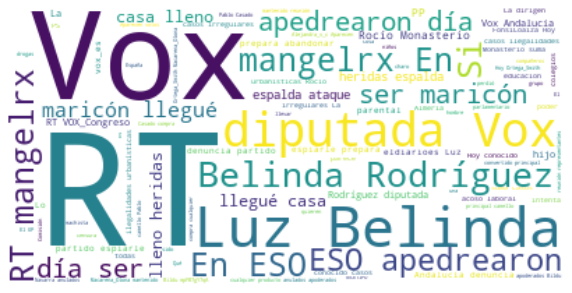

In [69]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt

#tweets = map(clean_tweet, tweets_all["text"])
tweets = [clean_tweet(tweet) for tweet in tweets_all['text']]

text = " ".join(review for review in tweets)
print("There are {} words in the combination of all review. ".format(len(text)))

#create stopword list

stopwords = set(STOPWORDS)
stopwords.update(["http","https", "co"])

# generate wordcloud image
wordcloud = WordCloud(stopwords=stopwords,background_color="white").generate(text)

#Display generated image:

plt.figure(figsize=(10,15))
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis("off")
plt.show()

In [17]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt

text = " ".join(review for review in tweets.text)
print("There are {} words in the combination of all review. ".format(len(text)))

#create stopword list

stopwords = set(STOPWORDS)
stopwords.update(["http","https", "co"])

# generate wordcloud image
wordcloud = WordCloud(stopwords=stopwords,background_color="white").generate(text)

#Display generated image:

plt.figure(fgisize=(10,15))
plt.imshow(worldcloud, interplotation'bilinear')
plt.axis("off")
plt.show()



SyntaxError: invalid syntax (<ipython-input-17-f718551a2191>, line 18)

### Your own analysis

In [ ]:
...